In [1]:
#général
import pandas as pd
import numpy as np
import time

#traitement texte
import re

#visualisation
import matplotlib.pyplot as plt

In [2]:
# Récupération des données
df=pd.read_fwf(r"C:\Users\John\Desktop\Formation\TH-NL-P1-decoupage_des_roles_d_une_piece_de_theatre\Le_Malade_imaginaire.txt",header=None,sep=" ")#,encoding='utf8',sep=';', header=None, names=['Column1', 'Column2'])

# Exploration

In [3]:
# extrait du df
df[300:350]

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
300,"Et, si de t’agréer je n’emporte le prix,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,J’aurai du moins l’honneur de l’avoir entrepri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,* * *,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,ACTE PREMIER.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,* * *,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,Scène I.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,"argan, assis, une table devant lui, comptant a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,"Trois et deux font cinq, et cinq font dix, et ...","e, c’est que ses parties sont toujours fort ci...","s entrailles de monsieur, trente sols. » Oui ;...","if, composé avec catholicon double, rhubarbe, ...","ur, trente sols. » Avec votre",permissi,"n, dix sols. « Plus, dudit jour, le soir, un j...",aire dormir mon,"ieur, t",ente-cinq sols. »,...,", comme de","sus, trente sols. » Monsie","r Fleurant, dix sols","« Plus, du vingt-septi","me, une bon",e médecin,", composée pour hâter d’aller et chasser deh","rs les mauvaises humeurs de monsieur,","rois livres. » Bon, vingt et trente sols ; je sui",NaN
308,Scène II.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,"ARGAN, TOINETTE.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1-Cleaning

In [4]:
# Punctuation removal function
def remove_punct(text):
    """
        Remove the punctuation
    """
    return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)


In [5]:
# On enlève la ponctuation et on tokenize
from nltk.tokenize import word_tokenize
for c in range(0,df.shape[1]):
    for r in range(0,len(df)):
        if type(df.iloc[r,c]) == str :
            df.iloc[r,c] = remove_punct(df.iloc[r,c])
            df.iloc[r,c] = word_tokenize(df.iloc[r,c])

In [6]:
# Rassembler les lignes dans une colonne "cleaned"
from functools import reduce
col = []
for i in range(0, len(df)):
    col.append(reduce(lambda x,y : x+y if (type(x) == list and type(y) == list) else x, df[i:i+1].values.tolist()[0]))
df["cleaned"] = col

## 2-Extraction des données

In [7]:
# Création d'un tableau réduit aux lignes étapes et personnages. Les lignes sont identifiées par leur index
data = [['Index', 'Acte', 'Scène', 'Personnage', 'Nb de mots']]
lnom = ['argan', 'béline', 'angélique', 'cléante', 'béralde', 'louison', 'toinette']
lnom_comp = ['monsieur','thomas']
lstage = ['ACTE', 'Scène', 'prologue', 'INTERMÈDE']

In [8]:
# On itère le tableau data
# pour chaque ligne
for r in range(0, len(df)):
    # si elle contient un mot de lnom ou lstage
    for nom in lnom + lstage + lnom_comp:
        try:
            if nom in df["cleaned"][r][0:1]:
                # on appende la ligne
                data.append([r,df["cleaned"][r][0:2],0,0,0])
        except:
            continue

In [10]:
# stockage des noms au type texte au lieu de liste
for i in range(0,len(data)):
    for n in lnom:
        if n in data[i][1]:
            data[i][1] = n
    for n in lnom_comp:
        if n in data[i][1]:
            data[i][1] = ' '.join(data[i][1])

In [12]:
# petite vérification sur les actes et intermèdes
ext = [sous_liste for sous_liste in data if any(isinstance(item, list) and ('INTERMÈDE' in item or 'ACTE' in item) for item in sous_liste if isinstance(item, (str, list)))]
ext

[[303, ['ACTE', 'PREMIER'], 0, 0, 0],
 [1277, ['ACTE', 'SECOND'], 0, 0, 0],
 [2016, ['ACTE', 'TROISIÈME'], 0, 0, 0]]

In [13]:
# on cherche l'index du df de la première ligne qui contient 'ACTE' dans data
start_index = data.index([303, ['ACTE', 'PREMIER'], 0, 0, 0])

In [15]:
# on redessine data en data_ à partir de cette ligne
data_ = data.copy()
data_ = data_[0:1]+data_[6:]

In [16]:
# on met les noms à leur place
for r in range(1, len(data_)):
    if isinstance(data_[r][1],str):
        
        data_[r][3]=data_[r][1]
        data_[r][1]=0

In [18]:
# On remplace les monsieur de par monsieur de bonnefoi
for i in range(0,len(data_)):
    if data_[i][3] == 'monsieur de':
        data_[i][3] = 'monsieur de bonnefoi'    

In [19]:
# on fait la même chose pour ACTE
for r in range(1, len(data_)):
    try:
        if 'ACTE' in data_[r][1]:
            new = data_[r][1][0] + " " + data_[r][1][1]
            data_[r][1] = new
    except:
        continue

In [20]:
# on fait la même chose pour Scène
for r in range(1, len(data_)):
    try:
        if 'Scène' in data_[r][1]:
            new = data_[r][1][0] + " " + data_[r][1][1]
            data_[r][2] = new
            data_[r][1] = 0
    except:
        continue

In [21]:
# Maintenant dans les lignes où on a le nom des personnages on va compter le nb de mot dans la tirade
# On stock le n° de la ligne considérée
list_l = [data_[i][0] for i in range(1,len(data_)) if data_[i][3]!=0]

In [22]:
# On stocke dans des variable l'index des lignes de départ (exlus) et de fin de la tirade (exclus)
for i in range(0,len(list_l)):
    db = list_l[i]
    try :
        fi = list_l[i+1]
    except :
        fi = db + 2
    # On stocke dans une variable le nombre de mots entre db exclus jusqu'à fi exclus
    nb = reduce(lambda x,y : x+y, [len(df.loc[df.index ==r,"cleaned"].values.tolist()[0]) for r in range(db+1,fi)])
    # Et on met ce nombre dans la dernière cellule de la ligne correspondant à db dans data_
    index = None
    for i, row in enumerate(data_):
        if row[0] == db:
            index = i
            break
    data_[index][-1] = nb

In [24]:
#on va colorer les lignes caractéristiques détectées et voir ce que ça donne sur un doc excel

# Indices des lignes à colorer
indices_to_color = [data[r][0] for r in range(1, len(data))]

# Création de la fonction de mise en forme pour colorer les lignes spécifiques
def highlight_row(row):
    if row.name in indices_to_color:
        return ['background-color: yellow'] * len(row)
    else:
        return [''] * len(row)

# Application de la fonction de mise en forme au DataFrame
styled_df = df.style.apply(highlight_row, axis=1)

# Affichage du DataFrame stylisé
styled_df.to_excel("df_color.xlsx")

In [26]:
# Maintenant on mais les acte et les scènes dans les lignes au même niveau que les personnages dans data_
# Si la ligne contient Acte on copie cette données dans les cellules du dessous jusqu'à rencontrer une 
# nouvelle cellule différente de 0
for r in range(1,len(data_)):
    if data_[r][1] != 0:
        i = r+1
        try:
            while data_[i][1] == 0:
                data_[i][1] = data_[r][1]
                i = i+1
        except:
            break

In [28]:
# Même chose avec les scène
for r in range(1,len(data_)):
    if data_[r][2] != 0:
        i = r+1
        try:
            while data_[i][2] == 0:
                data_[i][2] = data_[r][2]
                i = i+1
        except:
            break

In [30]:
# Et pour terminer on supprime toutes les lignes qui n'ont pas de personnage
data_f = [row for row in data_ if row[3]!=0]

In [31]:
# On convertif en df
df_t = pd.DataFrame(data_f[1:], columns = data_f[0])

In [32]:
series = df_t.groupby(['Acte','Personnage'])['Nb de mots'].sum()

## Visualisation

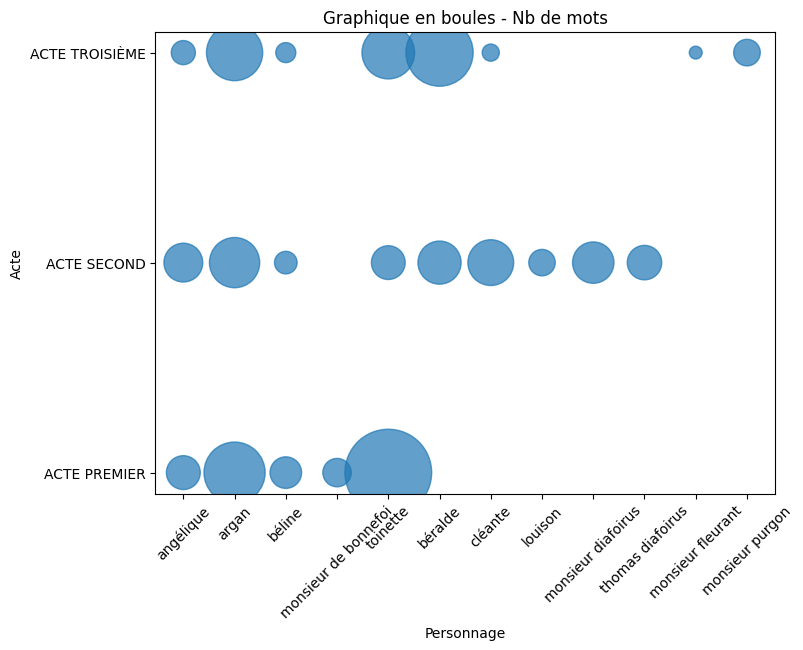

In [33]:
# Création du graphique en boules
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(series.index.get_level_values('Personnage'), series.index.get_level_values('Acte'),
           s=series.values, alpha=0.7)

# Configuration des axes et du titre
ax.set_xlabel('Personnage')
ax.set_ylabel('Acte')
ax.set_title('Graphique en boules - Nb de mots')
plt.xticks(rotation=45)#,fontsize=12)

# Affichage du graphique
plt.show()